<a href="https://colab.research.google.com/github/alejandromunizsiques/Sales_prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montaje googledrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Montaje de librerias

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error





# Montaje Dataset y info

In [ ]:
sales3 = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/PandasParaManipulaciónDeDatos/sales_predictions.csv')
sales3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Tabulacion Dataset

In [ ]:
sales3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [ ]:
sales_snulls = sales3.dropna()


item_avg_weight = sales_snulls.pivot_table(values="Item_Weight", index="Item_Identifier")
item_avg_weight


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


## Remplazo de datos ( item weight)


In [ ]:
for x in (item_avg_weight.index):
  for i  in sales3[sales3["Item_Identifier"]  == x]["Item_Weight"].index:
    sales3.loc[i,"Item_Weight"] = item_avg_weight.loc[x][0]

sales3.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8500 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
filtro_1 = sales3["Item_Identifier"] == "DRA24"
sales3[filtro_1]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
2879,DRA24,19.35,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
4416,DRA24,19.35,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436


In [ ]:
sales_sin_nulls = sales3.dropna()
sales_sin_nulls
sales3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Remplazo Outlet_Size


In [ ]:
sales_definitivo = sales3.dropna()
sales_definitivo.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6090 non-null   object 
 1   Item_Weight                6090 non-null   float64
 2   Item_Fat_Content           6090 non-null   object 
 3   Item_Visibility            6090 non-null   float64
 4   Item_Type                  6090 non-null   object 
 5   Item_MRP                   6090 non-null   float64
 6   Outlet_Identifier          6090 non-null   object 
 7   Outlet_Establishment_Year  6090 non-null   int64  
 8   Outlet_Size                6090 non-null   object 
 9   Outlet_Location_Type       6090 non-null   object 
 10  Outlet_Type                6090 non-null   object 
 11  Item_Outlet_Sales          6090 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 618.5+ KB


# Analisis Grafico

## Relacion Ventas con outlet

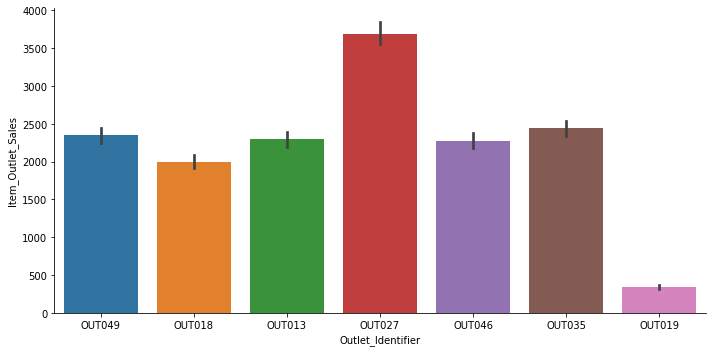

In [ ]:
sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales",  kind="bar", data=sales_definitivo, aspect= 2)


## Relacion tipo de producto-ventas

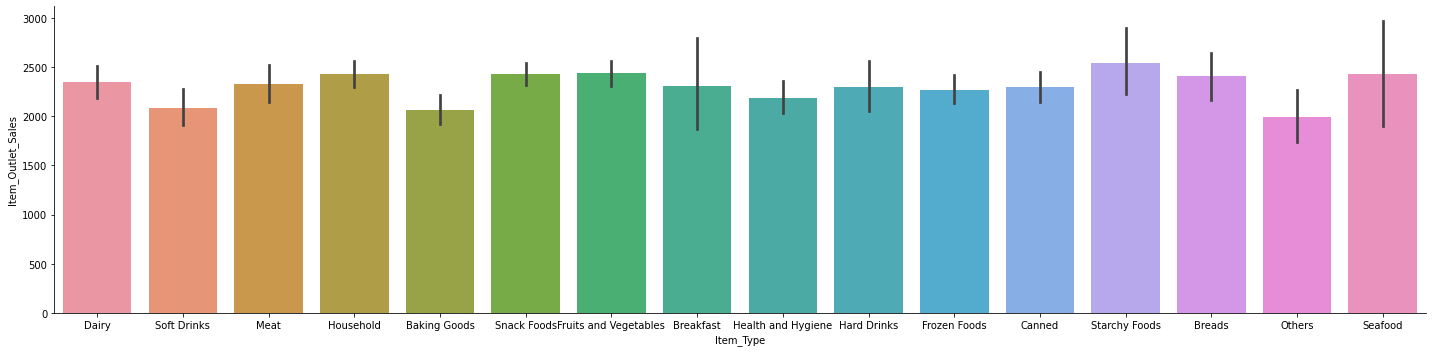

In [ ]:
sns.catplot(x="Item_Type", y="Item_Outlet_Sales",  kind="bar", data=sales_definitivo, aspect= 4)

# Preprocessing

In [ ]:
X = sales_definitivo.drop(["Item_Outlet_Sales","Item_Identifier"],axis=1)
y = sales_definitivo["Item_Outlet_Sales"]


#Columns_Trans = make_column_transformer(
 #   ( 
  #      OneHotEncoder(sparse=False),
   # ['Item_Fat_Content'
    #,'Item_Type'
    #,'Outlet_Identifier'
    #,'Outlet_Size'
    #,'Outlet_Location_Type'
    #,'Outlet_Type'
    #]),
    #remainder = 'passthrough',
    #column(s) = str
    
  #)
#make_column_transformer()
#X = Columns_Trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.6, random_state = 1)




NameError: ignored

# Generacion del modelo de regresion

In [ ]:
regresion_lineal = LinearRegression()

# PipeLine

In [ ]:
pipe = make_pipeline(Columns_Trans,regresion_lineal)

# Validacion Cruzada

In [ ]:

cross_val_score(pipe,X_train,y_train, scoring = "accuracy",cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Specifying the columns using strings is only supported for pandas DataFrames

  FitFailedWarning)


array([nan, nan, nan, nan, nan])

In [ ]:
X_train[0][0]

<1x1577 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>